In [1]:
import numpy as np 
import pandas as pd
import requests
from bs4 import BeautifulSoup
import json
import numpy as np
from sqlalchemy import create_engine, text
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Data Scrapping

In [2]:
base_url = 'https://understat.com/league'
leagues = ['EPL']
seasons = ['2020', '2021', '2022', '2023', '2024']

In [4]:
url = base_url+'/'+leagues[0]+'/'+seasons[4]
res = requests.get(url)
soup = BeautifulSoup(res.content, "lxml")
scripts = soup.find_all('script')

In [5]:
scripts

[<script>
 			var THEME = localStorage.getItem("theme") || 'DARK';
 			document.body.className = "theme-" + THEME.toLowerCase();
 		</script>,
 <script>
 	var datesData 	= JSON.parse('\x5B\x7B\x22id\x22\x3A\x2226602\x22,\x22isResult\x22\x3Atrue,\x22h\x22\x3A\x7B\x22id\x22\x3A\x2289\x22,\x22title\x22\x3A\x22Manchester\x20United\x22,\x22short_title\x22\x3A\x22MUN\x22\x7D,\x22a\x22\x3A\x7B\x22id\x22\x3A\x22228\x22,\x22title\x22\x3A\x22Fulham\x22,\x22short_title\x22\x3A\x22FLH\x22\x7D,\x22goals\x22\x3A\x7B\x22h\x22\x3A\x221\x22,\x22a\x22\x3A\x220\x22\x7D,\x22xG\x22\x3A\x7B\x22h\x22\x3A\x222.04268\x22,\x22a\x22\x3A\x220.418711\x22\x7D,\x22datetime\x22\x3A\x222024\x2D08\x2D16\x2019\x3A00\x3A00\x22,\x22forecast\x22\x3A\x7B\x22w\x22\x3A\x220.8069\x22,\x22d\x22\x3A\x220.1489\x22,\x22l\x22\x3A\x220.0442\x22\x7D\x7D,\x7B\x22id\x22\x3A\x2226603\x22,\x22isResult\x22\x3Atrue,\x22h\x22\x3A\x7B\x22id\x22\x3A\x22285\x22,\x22title\x22\x3A\x22Ipswich\x22,\x22short_title\x22\x3A\x22IPS\x22\x7D,\x22a\x22\x

it becomes just a string, so we find that text and extract JSON from it

In [6]:
string_with_json_obj = ''

# Find data for teams
for el in scripts:
    if 'teamsData' in el.text:
        string_with_json_obj = el.text.strip()
      # print(string_with_json_obj)

# strip unnecessary symbols and get only JSON data
ind_start = string_with_json_obj.index("('")+2
ind_end = string_with_json_obj.index("')")
json_data = string_with_json_obj[ind_start:ind_end]

json_data = json_data.encode('utf8').decode('unicode_escape')

We can convert it into Python dictionary and check how it looks

In [7]:
# convert JSON data into Python dictionary
data = json.loads(json_data)
print(data.keys())
print('='*50)
print(data['88'].keys())
print('='*50)
print(data['88']['id'])
print('='*50)
print(data['88']['title'])
print('='*50)
print(data['88']['history'][0])

dict_keys(['71', '72', '73', '74', '75', '78', '80', '81', '82', '83', '86', '87', '88', '89', '220', '228', '229', '244', '249', '285'])
dict_keys(['id', 'title', 'history'])
88
Manchester City
{'h_a': 'a', 'xG': 1.18038, 'xGA': 1.06123, 'npxG': 1.18038, 'npxGA': 1.06123, 'ppda': {'att': 256, 'def': 17}, 'ppda_allowed': {'att': 312, 'def': 31}, 'deep': 10, 'deep_allowed': 8, 'scored': 2, 'missed': 0, 'xpts': 1.4402, 'result': 'w', 'date': '2024-08-18 15:30:00', 'wins': 1, 'draws': 0, 'loses': 0, 'pts': 3, 'npxGD': 0.11915000000000009}


Get teams and their relevant ids and put them into separate dictionary

In [8]:
teams = {}
for id in data.keys():
    teams[id] = data[id]['title']

In [9]:
#Column names are all the same, so we just use first element
columns = []
for id in data.keys():
    columns = list(data[id]['history'][0].keys())
    values = list(data[id]['history'][0].values())
    break
print(columns)
print(values)    

['h_a', 'xG', 'xGA', 'npxG', 'npxGA', 'ppda', 'ppda_allowed', 'deep', 'deep_allowed', 'scored', 'missed', 'xpts', 'result', 'date', 'wins', 'draws', 'loses', 'pts', 'npxGD']
['a', 2.6703, 2.8047, 2.6703, 2.04353, {'att': 260, 'def': 23}, {'att': 224, 'def': 24}, 8, 5, 2, 1, 1.2989000000000002, 'w', '2024-08-17 16:30:00', 1, 0, 0, 3, 0.62677]


In [10]:
data

{'71': {'id': '71',
  'title': 'Aston Villa',
  'history': [{'h_a': 'a',
    'xG': 2.6703,
    'xGA': 2.8047,
    'npxG': 2.6703,
    'npxGA': 2.04353,
    'ppda': {'att': 260, 'def': 23},
    'ppda_allowed': {'att': 224, 'def': 24},
    'deep': 8,
    'deep_allowed': 5,
    'scored': 2,
    'missed': 1,
    'xpts': 1.2989000000000002,
    'result': 'w',
    'date': '2024-08-17 16:30:00',
    'wins': 1,
    'draws': 0,
    'loses': 0,
    'pts': 3,
    'npxGD': 0.62677},
   {'h_a': 'h',
    'xG': 1.31664,
    'xGA': 1.41399,
    'npxG': 1.31664,
    'npxGA': 1.41399,
    'ppda': {'att': 311, 'def': 18},
    'ppda_allowed': {'att': 175, 'def': 30},
    'deep': 3,
    'deep_allowed': 10,
    'scored': 0,
    'missed': 2,
    'xpts': 1.2362000000000002,
    'result': 'l',
    'date': '2024-08-24 16:30:00',
    'wins': 0,
    'draws': 0,
    'loses': 1,
    'pts': 0,
    'npxGD': -0.09735000000000005},
   {'h_a': 'a',
    'xG': 2.16385,
    'xGA': 0.774741,
    'npxG': 2.16385,
    'npxGA'

Adding All Teams

In [11]:
dataframes = {}
for id, team in teams.items():
    teams_data = []
    for row in data[id]['history']:
        teams_data.append(list(row.values()))
    
    df = pd.DataFrame(teams_data, columns=columns)
    dataframes[team] = df
    print('Added data for {}.'.format(team))

Added data for Aston Villa.
Added data for Everton.
Added data for Bournemouth.
Added data for Southampton.
Added data for Leicester.
Added data for Crystal Palace.
Added data for Chelsea.
Added data for West Ham.
Added data for Tottenham.
Added data for Arsenal.
Added data for Newcastle United.
Added data for Liverpool.
Added data for Manchester City.
Added data for Manchester United.
Added data for Brighton.
Added data for Fulham.
Added data for Wolverhampton Wanderers.
Added data for Brentford.
Added data for Nottingham Forest.
Added data for Ipswich.


Now we have a dictionary of DataFrames where key is the name of the team and value is the DataFrame with all games of that team.

In [12]:
# Sample check of our newly created DataFrame
dataframes['Liverpool'].head(2)

,h_a,xG,xGA,npxG,npxGA,ppda,ppda_allowed,deep,deep_allowed,scored,missed,xpts,result,date,wins,draws,loses,pts,npxGD
0,a,3.92906,0.342601,3.92906,0.342601,"{'att': 201, 'def': 23}","{'att': 338, 'def': 18}",13,2,2,0,2.9562,w,2024-08-17 11:30:00,1,0,0,3,3.586459
1,h,2.71877,0.457239,2.71877,0.457239,"{'att': 233, 'def': 23}","{'att': 324, 'def': 10}",21,2,2,0,2.7572,w,2024-08-25 15:30:00,1,0,0,3,2.261531


We can notice that here such metrics as PPDA and OPPDA (ppda and ppda_allowed) are represented as total amounts of attacking/defensive actions, but in the original table it is shown as coefficient. Let's fix that!

In [13]:
for team, df in dataframes.items():
    dataframes[team]['ppda_coef'] = dataframes[team]['ppda'].apply(lambda x: x['att']/x['def'] if x['def'] != 0 else 0)
    dataframes[team]['ppda_att'] = dataframes[team]['ppda'].apply(lambda x: x['att'])
    dataframes[team]['ppda_def'] = dataframes[team]['ppda'].apply(lambda x: x['def'])
    dataframes[team]['oppda_coef'] = dataframes[team]['ppda_allowed'].apply(lambda x: x['att']/x['def'] if x['def'] != 0 else 0)
    dataframes[team]['oppda_att'] = dataframes[team]['ppda_allowed'].apply(lambda x: x['att'])
    dataframes[team]['oppda_def'] = dataframes[team]['ppda_allowed'].apply(lambda x: x['def'])

In [14]:
# And check how our new dataframes look based on Sevilla dataframe
dataframes['Arsenal'].head(2)

,h_a,xG,xGA,npxG,npxGA,ppda,ppda_allowed,deep,deep_allowed,scored,...,draws,loses,pts,npxGD,ppda_coef,ppda_att,ppda_def,oppda_coef,oppda_att,oppda_def
0,h,1.62830,0.575835,1.62830,0.575835,"{'att': 202, 'def': 26}","{'att': 238, 'def': 22}",14,2,2,...,0,0,3,1.052465,7.769231,202,26,10.818182,238,22
1,a,1.41399,1.316640,1.41399,1.316640,"{'att': 175, 'def': 30}","{'att': 311, 'def': 18}",10,3,2,...,0,0,3,0.097350,5.833333,175,30,17.277778,311,18


Now we have all our numbers for every single game

Now we will drop 'ppda', 'ppda_allowed' after extracting their details

In [15]:
frames = []
for team, df in dataframes.items():
    df['team'] = team
    frames.append(df)
    
full_stat = pd.concat(frames)
full_stat = full_stat.drop(['ppda', 'ppda_allowed'], axis=1)

Also in the original table we have values of differences between expected metrics and real. Let's add those too.

In [16]:
full_stat['xG_diff'] = full_stat['xG'] - full_stat['scored']
full_stat['xGA_diff'] = full_stat['xGA'] - full_stat['missed']
full_stat['xpts_diff'] = full_stat['xpts'] - full_stat['pts']

In [17]:
full_stat.head()

,h_a,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,missed,xpts,...,ppda_coef,ppda_att,ppda_def,oppda_coef,oppda_att,oppda_def,team,xG_diff,xGA_diff,xpts_diff
0,a,2.67030,2.804700,2.67030,2.043530,8,5,2,1,1.2989,...,11.304348,260,23,9.333333,224,24,Aston Villa,0.67030,1.804700,-1.7011
1,h,1.31664,1.413990,1.31664,1.413990,3,10,0,2,1.2362,...,17.277778,311,18,5.833333,175,30,Aston Villa,1.31664,-0.586010,1.2362
2,a,2.16385,0.774741,2.16385,0.774741,6,3,2,1,2.4480,...,10.466667,314,30,6.400000,224,35,Aston Villa,0.16385,-0.225259,-0.5520
3,h,3.15876,0.852158,3.15876,0.852158,9,3,3,2,2.7595,...,5.260870,121,23,16.333333,294,18,Aston Villa,0.15876,-1.147842,-0.2405
4,h,2.37351,0.520117,2.37351,0.520117,9,4,3,1,2.6481,...,11.800000,236,20,13.500000,216,16,Aston Villa,-0.62649,-0.479883,-0.3519


Scraping data for all teams of all leagues of all seasons

In [18]:
season_data = dict()
season_data[seasons[4]] = full_stat
print(season_data)
full_data = dict()
full_data[leagues[0]] = season_data
print(full_data)

{'2024':    h_a        xG       xGA      npxG     npxGA  deep  deep_allowed  scored  \
0    a  2.670300  2.804700  2.670300  2.043530     8             5       2   
1    h  1.316640  1.413990  1.316640  1.413990     3            10       0   
2    a  2.163850  0.774741  2.163850  0.774741     6             3       2   
3    h  3.158760  0.852158  3.158760  0.852158     9             3       3   
4    h  2.373510  0.520117  2.373510  0.520117     9             4       3   
..  ..       ...       ...       ...       ...   ...           ...     ...   
10   a  2.183920  1.750880  2.183920  1.750880     6            10       2   
11   h  1.987140  1.269120  1.987140  1.269120     4             5       1   
12   a  0.462771  1.765870  0.462771  1.004700     5             3       0   
13   h  0.471708  1.654220  0.471708  1.654220     2             6       0   
14   h  1.566800  3.491270  1.566800  3.491270    12            12       1   

    missed    xpts  ...  ppda_coef ppda_att  ppda_def 

Putting all the previous code into loops to get all data

In [20]:
full_data = dict()
for league in leagues:
  
  season_data = dict()
  for season in seasons:    
    url = base_url+'/'+league+'/'+season
    res = requests.get(url)
    soup = BeautifulSoup(res.content, "lxml")

    # Based on the structure of the webpage, I found that data is in the JSON variable, under <script> tags
    scripts = soup.find_all('script')
    
    string_with_json_obj = ''

    # Find data for teams
    for el in scripts:
        if 'teamsData' in el.text:
          string_with_json_obj = el.text.strip()

    # print(string_with_json_obj)

    # strip unnecessary symbols and get only JSON data
    ind_start = string_with_json_obj.index("('")+2
    ind_end = string_with_json_obj.index("')")
    json_data = string_with_json_obj[ind_start:ind_end]
    json_data = json_data.encode('utf8').decode('unicode_escape')
    
    
    # convert JSON data into Python dictionary
    data = json.loads(json_data)
    
    # Get teams and their relevant ids and put them into separate dictionary
    teams = {}
    for id in data.keys():
      teams[id] = data[id]['title']
      
    # EDA to get a feeling of how the JSON is structured
    # Column names are all the same, so we just use first element
    columns = []
    # Check the sample of values per each column
    values = []
    for id in data.keys():
      columns = list(data[id]['history'][0].keys())
      values = list(data[id]['history'][0].values())
      break
      
    # Getting data for all teams
    dataframes = {}
    for id, team in teams.items():
      teams_data = []
      for row in data[id]['history']:
        teams_data.append(list(row.values()))

      df = pd.DataFrame(teams_data, columns=columns)
      dataframes[team] = df
      # print('Added data for {}.'.format(team))
      
    
    for team, df in dataframes.items():
        dataframes[team]['ppda_coef'] = dataframes[team]['ppda'].apply(lambda x: x['att']/x['def'] if x['def'] != 0 else 0)
        dataframes[team]['ppda_att'] = dataframes[team]['ppda'].apply(lambda x: x['att'])
        dataframes[team]['ppda_def'] = dataframes[team]['ppda'].apply(lambda x: x['def'])
        dataframes[team]['oppda_coef'] = dataframes[team]['ppda_allowed'].apply(lambda x: x['att']/x['def'] if x['def'] != 0 else 0)
        dataframes[team]['oppda_att'] = dataframes[team]['ppda_allowed'].apply(lambda x: x['att'])
        dataframes[team]['oppda_def'] = dataframes[team]['ppda_allowed'].apply(lambda x: x['def'])
    
    frames = []
    for team, df in dataframes.items():
        df['team'] = team
        frames.append(df)
    
    full_stat = pd.concat(frames)
    full_stat = full_stat.drop(['ppda', 'ppda_allowed'], axis=1)
    
    full_stat['xG_diff'] = full_stat['xG'] - full_stat['scored']
    full_stat['xGA_diff'] = full_stat['xGA'] - full_stat['missed']
    full_stat['xpts_diff'] = full_stat['xpts'] - full_stat['pts']
    
    full_stat.reset_index(inplace=True, drop=True)
    season_data[season] = full_stat
  
  df_season = pd.concat(season_data)
  full_data[league] = df_season
  
data = pd.concat(full_data)
data.head()

h_a        xG       xGA      npxG     npxGA  deep  deep_allowed  \
EPL 2020 0   h  0.805270  0.849709  0.805270  0.088540    17             2   
         1   a  2.032220  0.534675  2.032220  0.534675    10             5   
         2   h  3.076260  1.657050  3.076260  1.657050     7            18   
         3   a  0.873776  0.671595  0.873776  0.671595     7             4   
         4   h  1.501250  2.376950  1.501250  2.376950     7            20   

            scored  missed    xpts  ...  ppda_coef ppda_att  ppda_def  \
EPL 2020 0       1       0  1.1601  ...   4.450000       89        20   
         1       3       0  2.4631  ...   9.303030      307        33   
         2       7       2  2.2569  ...  14.600000      365        25   
         3       1       0  1.5291  ...   9.217391      212        23   
         4       0       3  0.8236  ...  13.235294      225        17   

            oppda_coef  oppda_att  oppda_def         team   xG_diff  xGA_diff  \
EPL 2020 0   17.642857        247         14  Aston Villa -0.194730  0.849709   
         1    5.958333        143         24  Aston Villa -0.967780  0.534675   
         2    4.760000        119         25  Aston Villa -3.923740 -0.342950   
         3    8.750000        210         24  Aston Villa -0.126224  0.671595   
         4    3.647059        124         34  Aston Villa  1.501250 -0.623050   

            xpts_diff  
EPL 2020 0    -1.8399  
         1    -0.5369  
         2    -0.7431  
         3    -1.4709  
         4     0.8236  

[5 rows x 27 columns]

Now we will rename the league column and the year column

In [21]:
data.index = data.index.droplevel(2)
data.index = data.index.rename(names=['league','year'], level=[0,1])
data.head()

h_a        xG       xGA      npxG     npxGA  deep  deep_allowed  \
league year                                                                   
EPL    2020   h  0.805270  0.849709  0.805270  0.088540    17             2   
       2020   a  2.032220  0.534675  2.032220  0.534675    10             5   
       2020   h  3.076260  1.657050  3.076260  1.657050     7            18   
       2020   a  0.873776  0.671595  0.873776  0.671595     7             4   
       2020   h  1.501250  2.376950  1.501250  2.376950     7            20   

             scored  missed    xpts  ...  ppda_coef ppda_att  ppda_def  \
league year                          ...                                 
EPL    2020       1       0  1.1601  ...   4.450000       89        20   
       2020       3       0  2.4631  ...   9.303030      307        33   
       2020       7       2  2.2569  ...  14.600000      365        25   
       2020       1       0  1.5291  ...   9.217391      212        23   
       2020       0       3  0.8236  ...  13.235294      225        17   

             oppda_coef  oppda_att  oppda_def         team   xG_diff  \
league year                                                            
EPL    2020   17.642857        247         14  Aston Villa -0.194730   
       2020    5.958333        143         24  Aston Villa -0.967780   
       2020    4.760000        119         25  Aston Villa -3.923740   
       2020    8.750000        210         24  Aston Villa -0.126224   
       2020    3.647059        124         34  Aston Villa  1.501250   

             xGA_diff  xpts_diff  
league year                       
EPL    2020  0.849709    -1.8399  
       2020  0.534675    -0.5369  
       2020 -0.342950    -0.7431  
       2020  0.671595    -1.4709  
       2020 -0.623050     0.8236  

[5 rows x 27 columns]

In [22]:
data.to_csv('D://epl.csv')

# Data Processing

In [2]:
df=pd.read_csv("D://epl.csv")

In [3]:
df

,league,year,h_a,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,...,ppda_coef,ppda_att,ppda_def,oppda_coef,oppda_att,oppda_def,team,xG_diff,xGA_diff,xpts_diff
0,EPL,2020,h,0.805270,0.849709,0.805270,0.088540,17,2,1,...,4.450000,89,20,17.642857,247,14,Aston Villa,-0.194730,0.849709,-1.8399
1,EPL,2020,a,2.032220,0.534675,2.032220,0.534675,10,5,3,...,9.303030,307,33,5.958333,143,24,Aston Villa,-0.967780,0.534675,-0.5369
2,EPL,2020,h,3.076260,1.657050,3.076260,1.657050,7,18,7,...,14.600000,365,25,4.760000,119,25,Aston Villa,-3.923740,-0.342950,-0.7431
3,EPL,2020,a,0.873776,0.671595,0.873776,0.671595,7,4,1,...,9.217391,212,23,8.750000,210,24,Aston Villa,-0.126224,0.671595,-1.4709
4,EPL,2020,h,1.501250,2.376950,1.501250,2.376950,7,20,0,...,13.235294,225,17,3.647059,124,34,Aston Villa,1.501250,-0.623050,0.8236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3333,EPL,2024,a,2.183920,1.750880,2.183920,1.750880,6,10,2,...,9.354839,290,31,6.631579,126,19,Ipswich,0.183920,0.750880,-1.2702
3334,EPL,2024,h,1.987140,1.269120,1.987140,1.269120,4,5,1,...,21.136364,465,22,12.000000,216,18,Ipswich,0.987140,0.269120,0.9564
3335,EPL,2024,a,0.462771,1.765870,0.462771,1.004700,5,3,0,...,7.722222,139,18,12.875000,206,16,Ipswich,0.462771,0.765870,0.3504
3336,EPL,2024,h,0.471708,1.654220,0.471708,1.654220,2,6,0,...,10.956522,252,23,13.565217,312,23,Ipswich,0.471708,0.654220,0.4642


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3338 entries, 0 to 3337
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   league        3338 non-null   object 
 1   year          3338 non-null   int64  
 2   h_a           3338 non-null   object 
 3   xG            3338 non-null   float64
 4   xGA           3338 non-null   float64
 5   npxG          3338 non-null   float64
 6   npxGA         3338 non-null   float64
 7   deep          3338 non-null   int64  
 8   deep_allowed  3338 non-null   int64  
 9   scored        3338 non-null   int64  
 10  missed        3338 non-null   int64  
 11  xpts          3338 non-null   float64
 12  result        3338 non-null   object 
 13  date          3338 non-null   object 
 14  wins          3338 non-null   int64  
 15  draws         3338 non-null   int64  
 16  loses         3338 non-null   int64  
 17  pts           3338 non-null   int64  
 18  npxGD         3338 non-null 

In [5]:
df.describe()

,year,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,missed,xpts,...,npxGD,ppda_coef,ppda_att,ppda_def,oppda_coef,oppda_att,oppda_def,xG_diff,xGA_diff,xpts_diff
count,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,...,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000
mean,2021.723188,1.507827,1.507827,1.400750,1.400750,7.272618,7.272618,1.460156,1.460156,1.393310,...,0.000000,13.356760,250.109047,21.245656,13.356760,250.109047,21.245656,0.047671,0.047671,0.007151
std,1.283377,0.926105,0.926105,0.873813,0.873813,4.690733,4.690733,1.303185,1.303185,0.874931,...,1.391987,8.663893,88.848597,6.588203,8.663893,88.848597,6.588203,1.005222,1.005222,1.055165
min,2020.000000,0.020346,0.020346,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001500,...,-5.715141,2.529412,43.000000,2.000000,2.529412,43.000000,2.000000,-4.139650,-4.139650,-2.914600
25%,2021.000000,0.797846,0.797846,0.737954,0.737954,4.000000,4.000000,0.000000,0.000000,0.624900,...,-0.865522,8.153846,183.000000,17.000000,8.153846,183.000000,17.000000,-0.539751,-0.539751,-0.653600
50%,2022.000000,1.352815,1.352815,1.232640,1.232640,6.000000,6.000000,1.000000,1.000000,1.343000,...,0.000000,11.461538,246.000000,21.000000,11.461538,246.000000,21.000000,0.144138,0.144138,0.068750
75%,2023.000000,2.039455,2.039455,1.891500,1.891500,10.000000,10.000000,2.000000,2.000000,2.127325,...,0.865522,16.098810,309.000000,26.000000,16.098810,309.000000,26.000000,0.691944,0.691944,0.702525
max,2024.000000,6.671510,6.671510,6.053050,6.053050,37.000000,37.000000,9.000000,9.000000,2.997600,...,5.715141,193.000000,631.000000,45.000000,193.000000,631.000000,45.000000,3.659370,3.659370,2.870600


In [4]:
df['date'] = pd.to_datetime(df['date'])

convert "date" to data type

In [7]:
df.isnull().sum()

league          0
year            0
h_a             0
xG              0
xGA             0
npxG            0
npxGA           0
deep            0
deep_allowed    0
scored          0
missed          0
xpts            0
result          0
date            0
wins            0
draws           0
loses           0
pts             0
npxGD           0
ppda_coef       0
ppda_att        0
ppda_def        0
oppda_coef      0
oppda_att       0
oppda_def       0
team            0
xG_diff         0
xGA_diff        0
xpts_diff       0
dtype: int64

There is no null values

# Adding new column (goal_diff)

In [8]:
df['goal_diff'] = df['scored'] - df['missed']

In [9]:
df

,league,year,h_a,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,...,ppda_att,ppda_def,oppda_coef,oppda_att,oppda_def,team,xG_diff,xGA_diff,xpts_diff,goal_diff
0,EPL,2020,h,0.805270,0.849709,0.805270,0.088540,17,2,1,...,89,20,17.642857,247,14,Aston Villa,-0.194730,0.849709,-1.8399,1
1,EPL,2020,a,2.032220,0.534675,2.032220,0.534675,10,5,3,...,307,33,5.958333,143,24,Aston Villa,-0.967780,0.534675,-0.5369,3
2,EPL,2020,h,3.076260,1.657050,3.076260,1.657050,7,18,7,...,365,25,4.760000,119,25,Aston Villa,-3.923740,-0.342950,-0.7431,5
3,EPL,2020,a,0.873776,0.671595,0.873776,0.671595,7,4,1,...,212,23,8.750000,210,24,Aston Villa,-0.126224,0.671595,-1.4709,1
4,EPL,2020,h,1.501250,2.376950,1.501250,2.376950,7,20,0,...,225,17,3.647059,124,34,Aston Villa,1.501250,-0.623050,0.8236,-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3333,EPL,2024,a,2.183920,1.750880,2.183920,1.750880,6,10,2,...,290,31,6.631579,126,19,Ipswich,0.183920,0.750880,-1.2702,1
3334,EPL,2024,h,1.987140,1.269120,1.987140,1.269120,4,5,1,...,465,22,12.000000,216,18,Ipswich,0.987140,0.269120,0.9564,0
3335,EPL,2024,a,0.462771,1.765870,0.462771,1.004700,5,3,0,...,139,18,12.875000,206,16,Ipswich,0.462771,0.765870,0.3504,-1
3336,EPL,2024,h,0.471708,1.654220,0.471708,1.654220,2,6,0,...,252,23,13.565217,312,23,Ipswich,0.471708,0.654220,0.4642,-1


# Group by team and year to analyze total points

In [17]:
team_performance = df.groupby(['team', 'year'])['pts'].sum().reset_index()
print(team_performance)

                       team  year  pts
0                   Arsenal  2020   61
1                   Arsenal  2021   69
2                   Arsenal  2022   84
3                   Arsenal  2023   89
4                   Arsenal  2024   29
..                      ...   ...  ...
95  Wolverhampton Wanderers  2020   45
96  Wolverhampton Wanderers  2021   51
97  Wolverhampton Wanderers  2022   41
98  Wolverhampton Wanderers  2023   46
99  Wolverhampton Wanderers  2024    9

[100 rows x 3 columns]


In [16]:
sorted_data = df.sort_values(by=['pts', 'goal_diff'], ascending=[False, False])

In [15]:
sorted_data

,league,year,h_a,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,...,ppda_att,ppda_def,oppda_coef,oppda_att,oppda_def,team,xG_diff,xGA_diff,xpts_diff,goal_diff
515,EPL,2020,h,5.032500,0.507893,4.271330,0.507893,23,2,9,...,123,27,14.500000,232,16,Manchester United,-3.967500,0.507893,-0.0177,9
1941,EPL,2022,h,4.860350,0.180991,4.860350,0.180991,18,4,9,...,160,18,29.583333,355,12,Liverpool,-4.139650,0.180991,-0.0031,9
2589,EPL,2023,a,5.108200,0.579392,5.108200,0.579392,11,5,8,...,262,30,14.920000,373,25,Newcastle United,-2.891800,0.579392,-0.0264,8
431,EPL,2020,a,2.869020,0.489318,2.869020,0.489318,9,4,7,...,203,28,22.761905,478,21,Liverpool,-4.130980,0.489318,-0.2056,7
996,EPL,2021,h,3.105090,0.267429,2.343930,0.267429,10,0,7,...,248,36,18.166667,327,18,Chelsea,-3.894910,0.267429,-0.0823,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498,EPL,2021,a,0.227498,3.313490,0.227498,3.313490,2,14,0,...,351,13,11.650000,233,20,Leeds,0.227498,-3.686510,0.0453,-7
2038,EPL,2022,a,0.837542,3.442690,0.837542,3.442690,3,14,0,...,251,19,5.956522,137,23,Manchester United,0.837542,-3.557310,0.1561,-7
2893,EPL,2023,h,0.579392,5.108200,0.579392,5.108200,5,11,0,...,373,25,8.733333,262,30,Sheffield United,0.579392,-2.891800,0.0180,-8
96,EPL,2020,a,0.507893,5.032500,0.507893,4.271330,2,23,0,...,232,16,4.555556,123,27,Southampton,0.507893,-3.967500,0.0102,-9


# Expexted Goals (xG) vs Scored Goals

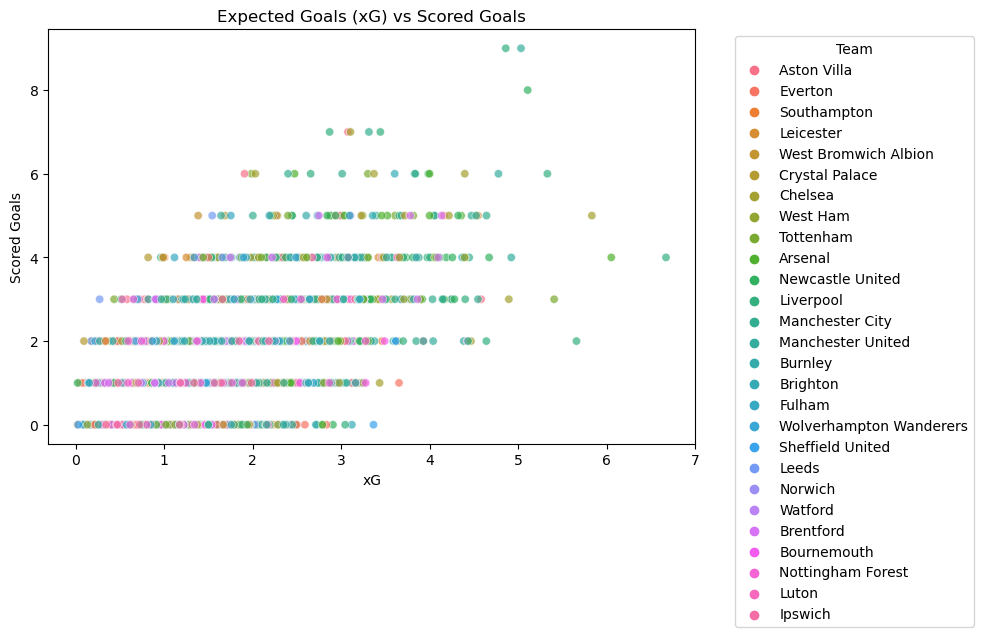

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='xG', y='scored', hue='team', alpha=0.7)
plt.title('Expected Goals (xG) vs Scored Goals')
plt.xlabel('xG')
plt.ylabel('Scored Goals')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Team')
plt.tight_layout()
plt.show()

# Top 10 Teams by Points in a 2023

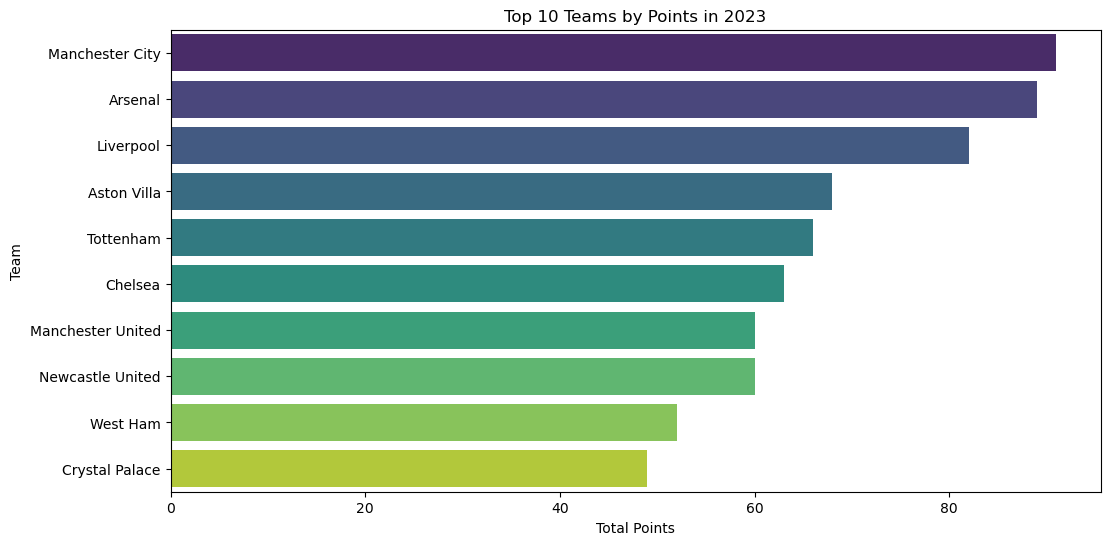

In [23]:
yyear = 2023
top_teams = df[df['year'] == year].groupby('team')['pts'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_teams.values, y=top_teams.index, palette='viridis')
plt.title(f'Top 10 Teams by Points in {year}')
plt.xlabel('Total Points')
plt.ylabel('Team')
plt.show()

# Top 10 Teams by xG (Expected Goals) in 2021

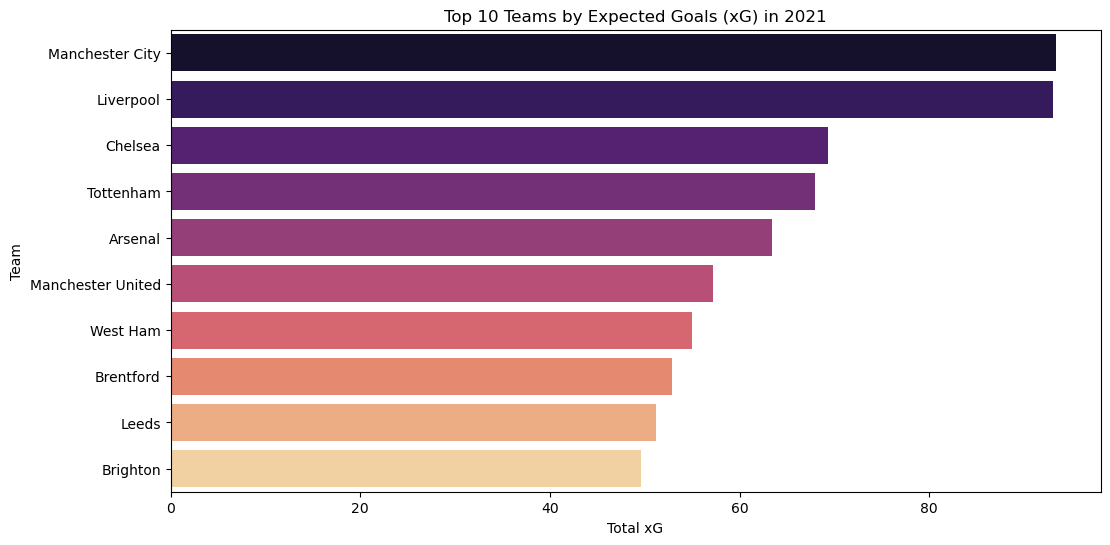

In [29]:
year = 2021
top_xG_teams = df[df['year'] == year].groupby('team')['xG'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_xG_teams.values, y=top_xG_teams.index, palette='magma')
plt.title(f'Top 10 Teams by Expected Goals (xG) in {year}')
plt.xlabel('Total xG')
plt.ylabel('Team')
plt.show()

# Goals Scored vs. Goals Missed (Team Performance)

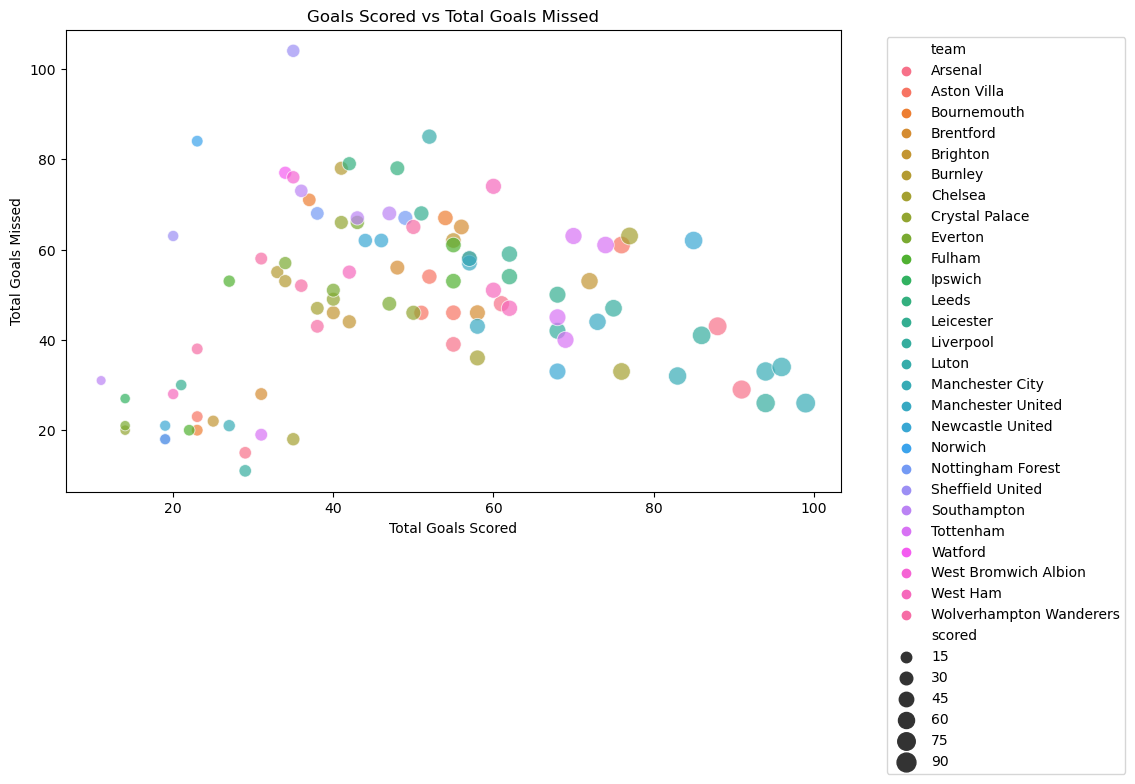

In [43]:
team_missed_per_year = df.groupby(['team', 'year'])['missed'].sum().reset_index()

team_goals_per_year = df.groupby(['team', 'year'])['scored'].sum().reset_index()

merged_df = pd.merge(team_goals_per_year, team_missed_per_year, on=['team', 'year'])


plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='scored', y='missed', hue='team', size='scored', sizes=(50, 200), alpha=0.7)
plt.title('Goals Scored vs Total Goals Missed')
plt.xlabel('Total Goals Scored')
plt.ylabel('Total Goals Missed')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# Heatmap of Team Performance Metrics

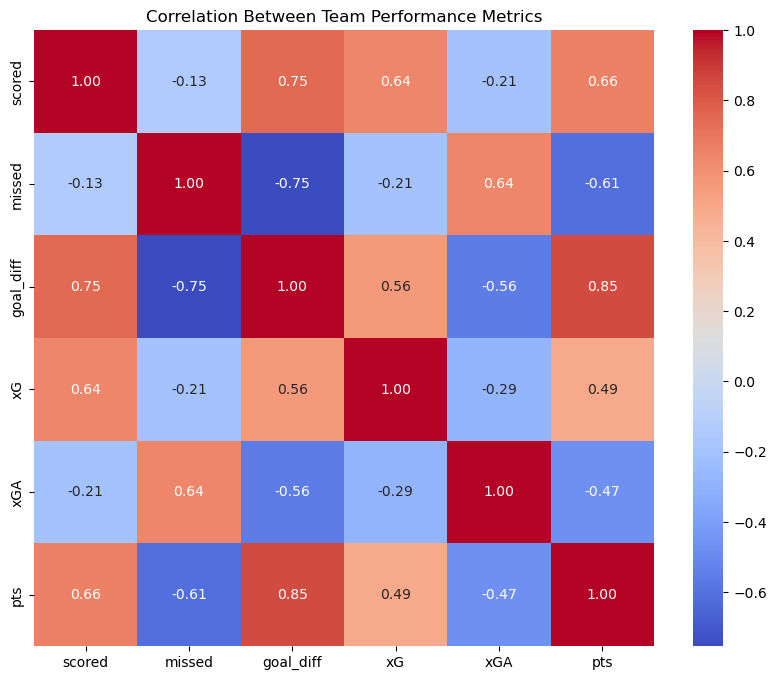

In [35]:
metrics = df[['scored', 'missed', 'goal_diff', 'xG', 'xGA', 'pts']]
plt.figure(figsize=(10, 8))
sns.heatmap(metrics.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Team Performance Metrics')
plt.show()


# Goals Scored Over the Years (Line Plot for All Teams)

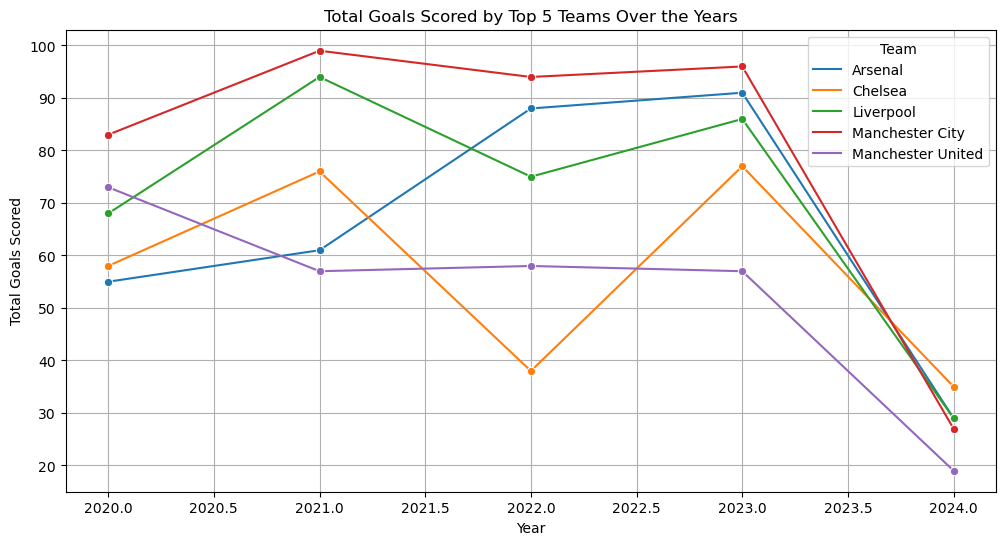

In [42]:
team_goals_per_year = df.groupby(['team', 'year'])['scored'].sum().reset_index()

top_teams = df.groupby('team')['pts'].sum().nlargest(5).index  

filtered_df = team_goals_per_year[team_goals_per_year['team'].isin(top_teams)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_df, x='year', y='scored', hue='team', marker='o')
plt.title('Total Goals Scored by Top 5 Teams Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Goals Scored')
plt.legend(title='Team')
plt.grid(True)
plt.show()


   year  scored
0  2020    1024
1  2021    1071
2  2022    1084
3  2023    1246
4  2024     449


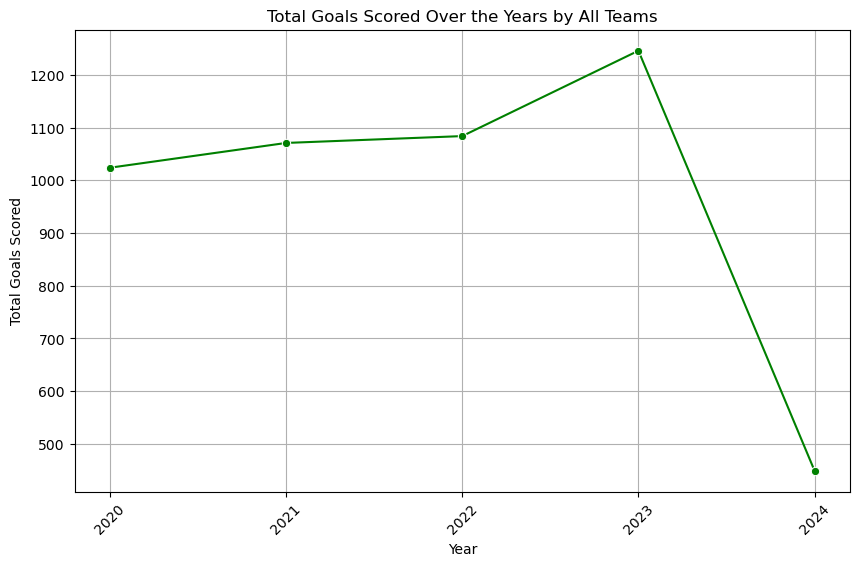

In [41]:
goals_per_year = df.groupby('year')['scored'].sum().reset_index()

print(goals_per_year)

plt.figure(figsize=(10, 6))
sns.lineplot(data=goals_per_year, x='year', y='scored', marker='o', color='green')
plt.title('Total Goals Scored Over the Years by All Teams')
plt.xlabel('Year')
plt.ylabel('Total Goals Scored')
plt.xticks(goals_per_year['year'], rotation=45)
plt.grid(True)
plt.show()

In [44]:
df.to_csv('D://updated_epl.csv', index=False)

# SQL

In [35]:
data=pd.read_csv("D://updated_epl.csv")
data.head(5)

,league,year,h_a,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,...,ppda_att,ppda_def,oppda_coef,oppda_att,oppda_def,team,xG_diff,xGA_diff,xpts_diff,goal_diff
0,EPL,2020,h,0.805270,0.849709,0.805270,0.088540,17,2,1,...,89,20,17.642857,247,14,Aston Villa,-0.194730,0.849709,-1.8399,1
1,EPL,2020,a,2.032220,0.534675,2.032220,0.534675,10,5,3,...,307,33,5.958333,143,24,Aston Villa,-0.967780,0.534675,-0.5369,3
2,EPL,2020,h,3.076260,1.657050,3.076260,1.657050,7,18,7,...,365,25,4.760000,119,25,Aston Villa,-3.923740,-0.342950,-0.7431,5
3,EPL,2020,a,0.873776,0.671595,0.873776,0.671595,7,4,1,...,212,23,8.750000,210,24,Aston Villa,-0.126224,0.671595,-1.4709,1
4,EPL,2020,h,1.501250,2.376950,1.501250,2.376950,7,20,0,...,225,17,3.647059,124,34,Aston Villa,1.501250,-0.623050,0.8236,-3


In [36]:
username = 'root'
password = '88488'
host = 'localhost'
port = '3306'
database = 'dst_project'

# Create connection string using pymysql
connection_string = f'mysql+pymysql://{username}:{password}@{host}:{port}'

# Create engine 
engine = create_engine(connection_string)


with engine.connect() as conn:
    conn.execute(text(f"CREATE DATABASE IF NOT EXISTS {database}"))
    conn.execute(text(f"USE {database}"))

# Create engine with database specified
connection_string_with_db = f'mysql+pymysql://{username}:{password}@{host}:{port}/{database}'
engine_with_db = create_engine(connection_string_with_db)

# Write the DataFrame to MySQL, create a table named 'Premier League'
data.to_sql('premier_league', con=engine_with_db, if_exists='replace', index=False)


3338

# visualization analysis using sql

In [37]:
query = "SELECT * FROM premier_league"
df = pd.read_sql(query, con=engine)
print(df.head(5))

  league  year h_a        xG       xGA      npxG     npxGA  deep  \
0    EPL  2020   h  0.805270  0.849709  0.805270  0.088540    17   
1    EPL  2020   a  2.032220  0.534675  2.032220  0.534675    10   
2    EPL  2020   h  3.076260  1.657050  3.076260  1.657050     7   
3    EPL  2020   a  0.873776  0.671595  0.873776  0.671595     7   
4    EPL  2020   h  1.501250  2.376950  1.501250  2.376950     7   

   deep_allowed  scored  ...  ppda_att  ppda_def oppda_coef oppda_att  \
0             2       1  ...        89        20  17.642857       247   
1             5       3  ...       307        33   5.958333       143   
2            18       7  ...       365        25   4.760000       119   
3             4       1  ...       212        23   8.750000       210   
4            20       0  ...       225        17   3.647059       124   

   oppda_def         team   xG_diff  xGA_diff  xpts_diff  goal_diff  
0         14  Aston Villa -0.194730  0.849709    -1.8399          1  
1         24

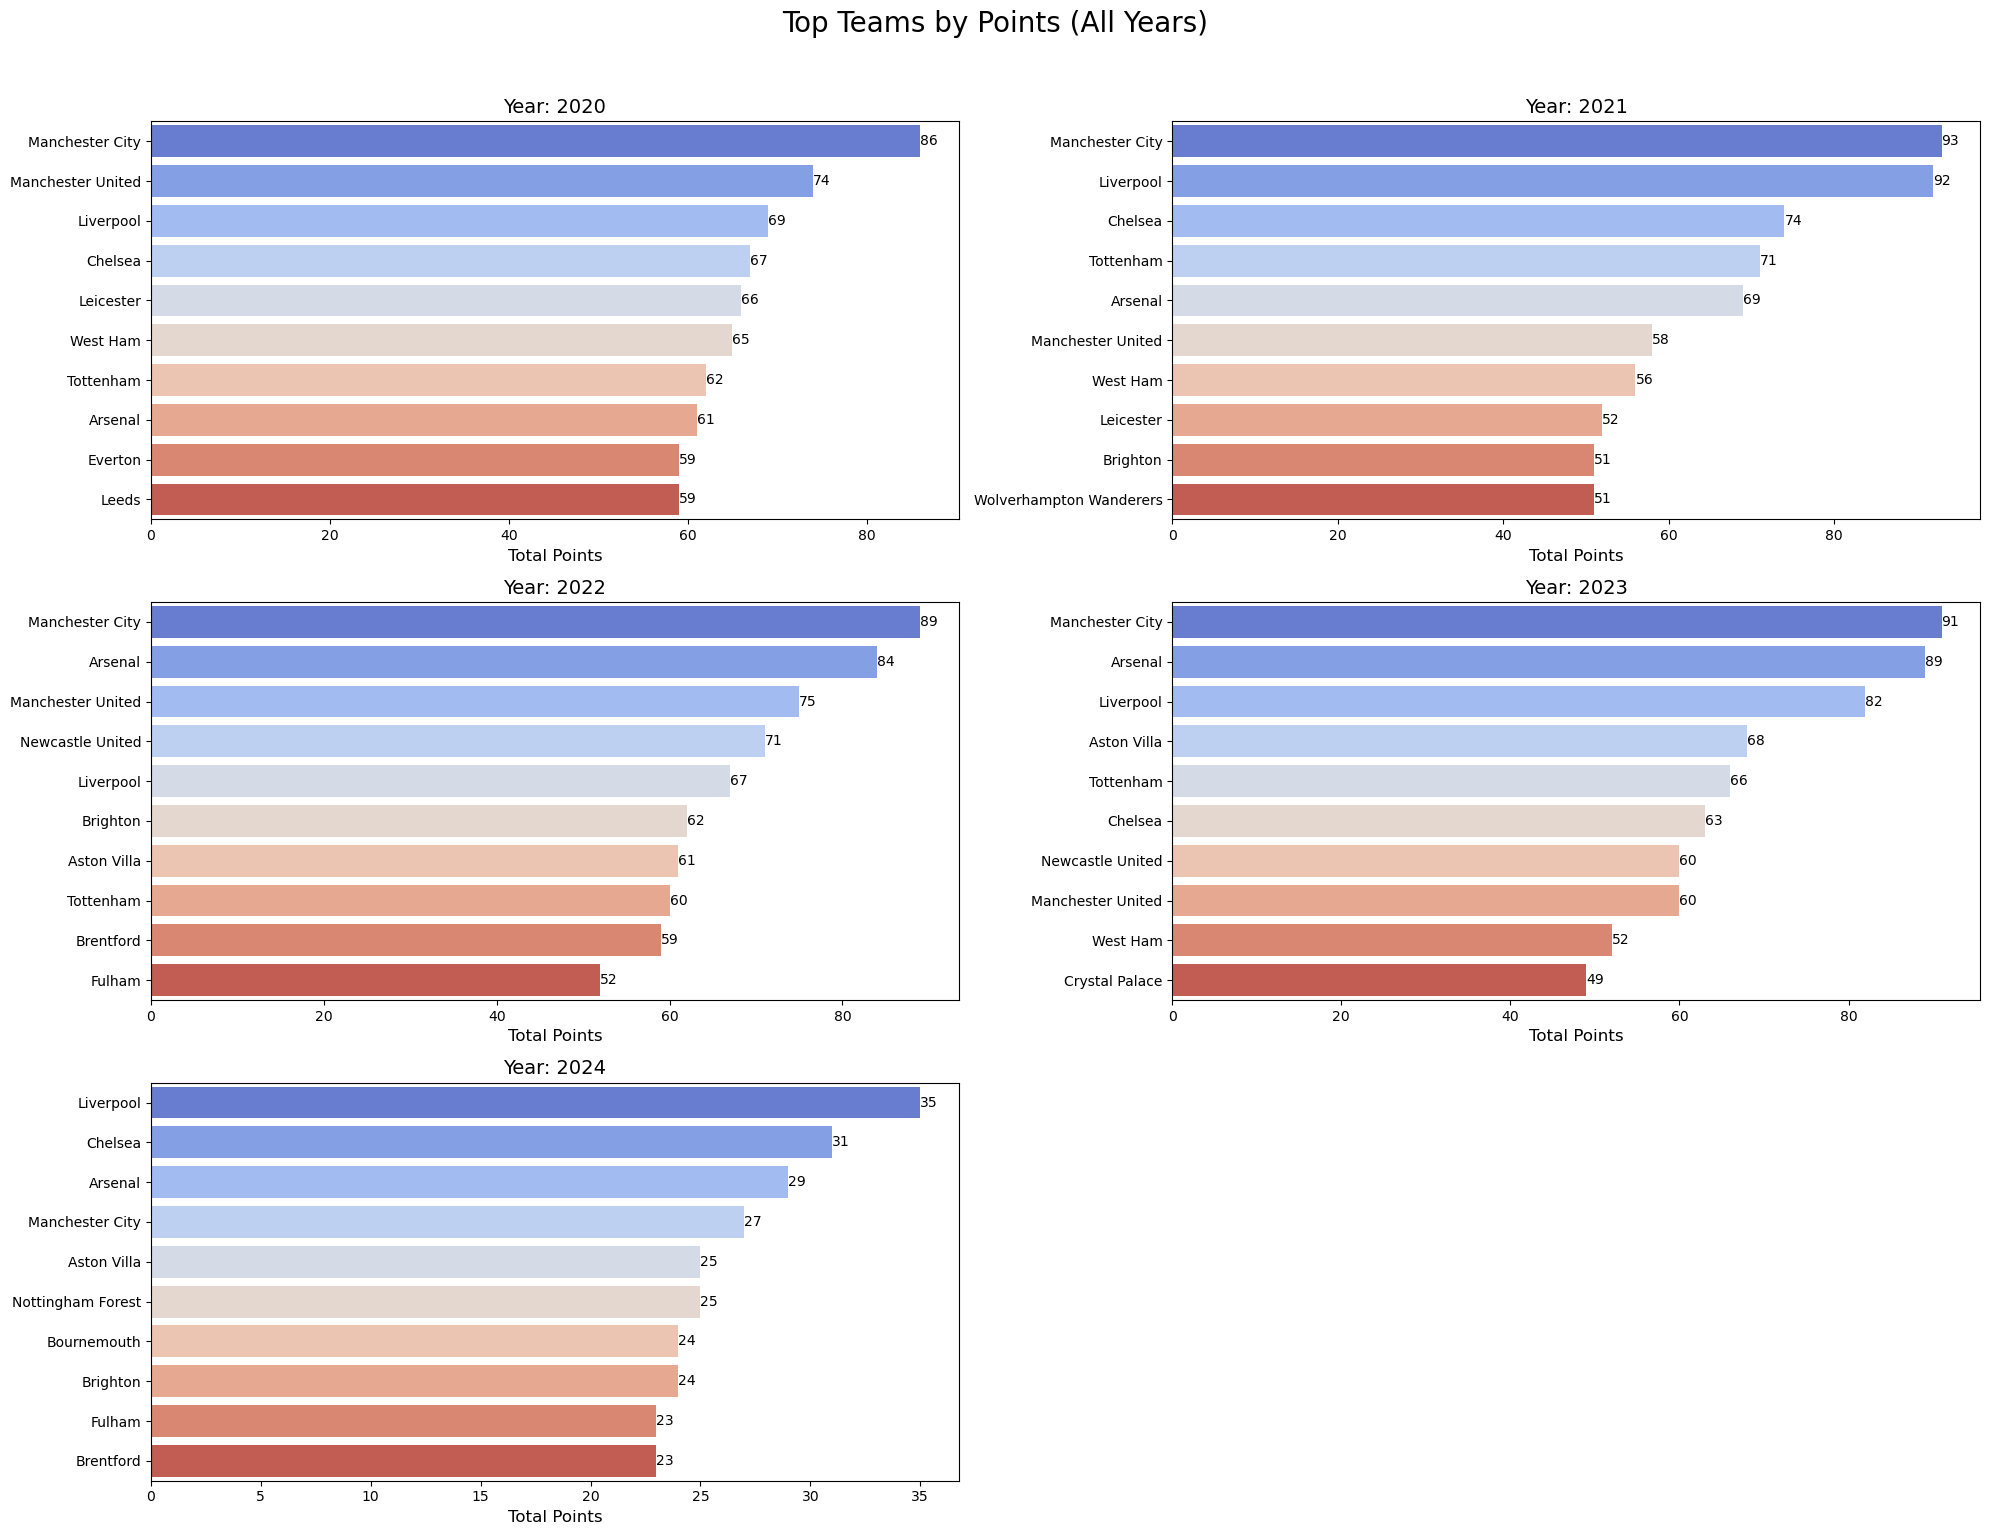

In [38]:
query_top_teams = """
SELECT year, team, SUM(pts) AS total_points
FROM premier_league
GROUP BY year, team
ORDER BY year, total_points DESC;
"""
df_top_teams = pd.read_sql(query_top_teams, con=engine_with_db)

grouped = df_top_teams.groupby('year')
years = sorted(df_top_teams['year'].unique())

cols = 2  
rows = 3  


fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 5))
fig.suptitle("Top Teams by Points (All Years)", fontsize=20, y=1.02)

axes = axes.flatten()

sns.set_palette("Blues_r")

for i, (year, group) in enumerate(grouped):
    ax = axes[i]
    top_teams = group.sort_values('total_points', ascending=False).head(10)
    
    sns.barplot(
        x='total_points',  
        y='team',           
        data=top_teams, 
        ax=ax, 
        palette='coolwarm'
    )
    
    ax.set_title(f"Year: {year}", fontsize=14)
    ax.set_xlabel("Total Points", fontsize=12)
    ax.set_ylabel("")

    for index, value in enumerate(top_teams['total_points']):
        ax.text(value, index, f'{value:.0f}', va='center')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.tight_layout()
plt.show()

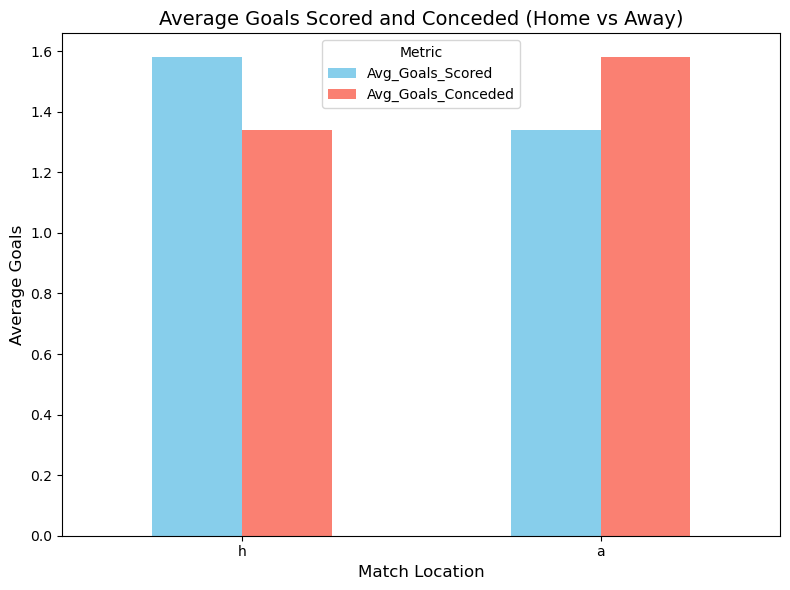

In [41]:
query_home_away = """
SELECT 
    h_a AS Match_Location,
    AVG(scored) AS Avg_Goals_Scored,
    AVG(missed) AS Avg_Goals_Conceded
FROM 
    premier_league
GROUP BY 
    h_a
"""


df_home_away = pd.read_sql(query_home_away, con=engine_with_db)



fig, ax = plt.subplots(figsize=(8, 6))


df_home_away.set_index('Match_Location')[['Avg_Goals_Scored', 'Avg_Goals_Conceded']].plot(kind='bar', ax=ax, color=['skyblue', 'salmon'])


ax.set_title('Average Goals Scored and Conceded (Home vs Away)', fontsize=14)
ax.set_ylabel('Average Goals', fontsize=12)
ax.set_xlabel('Match Location', fontsize=12)
ax.legend(title='Metric', fontsize=10)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

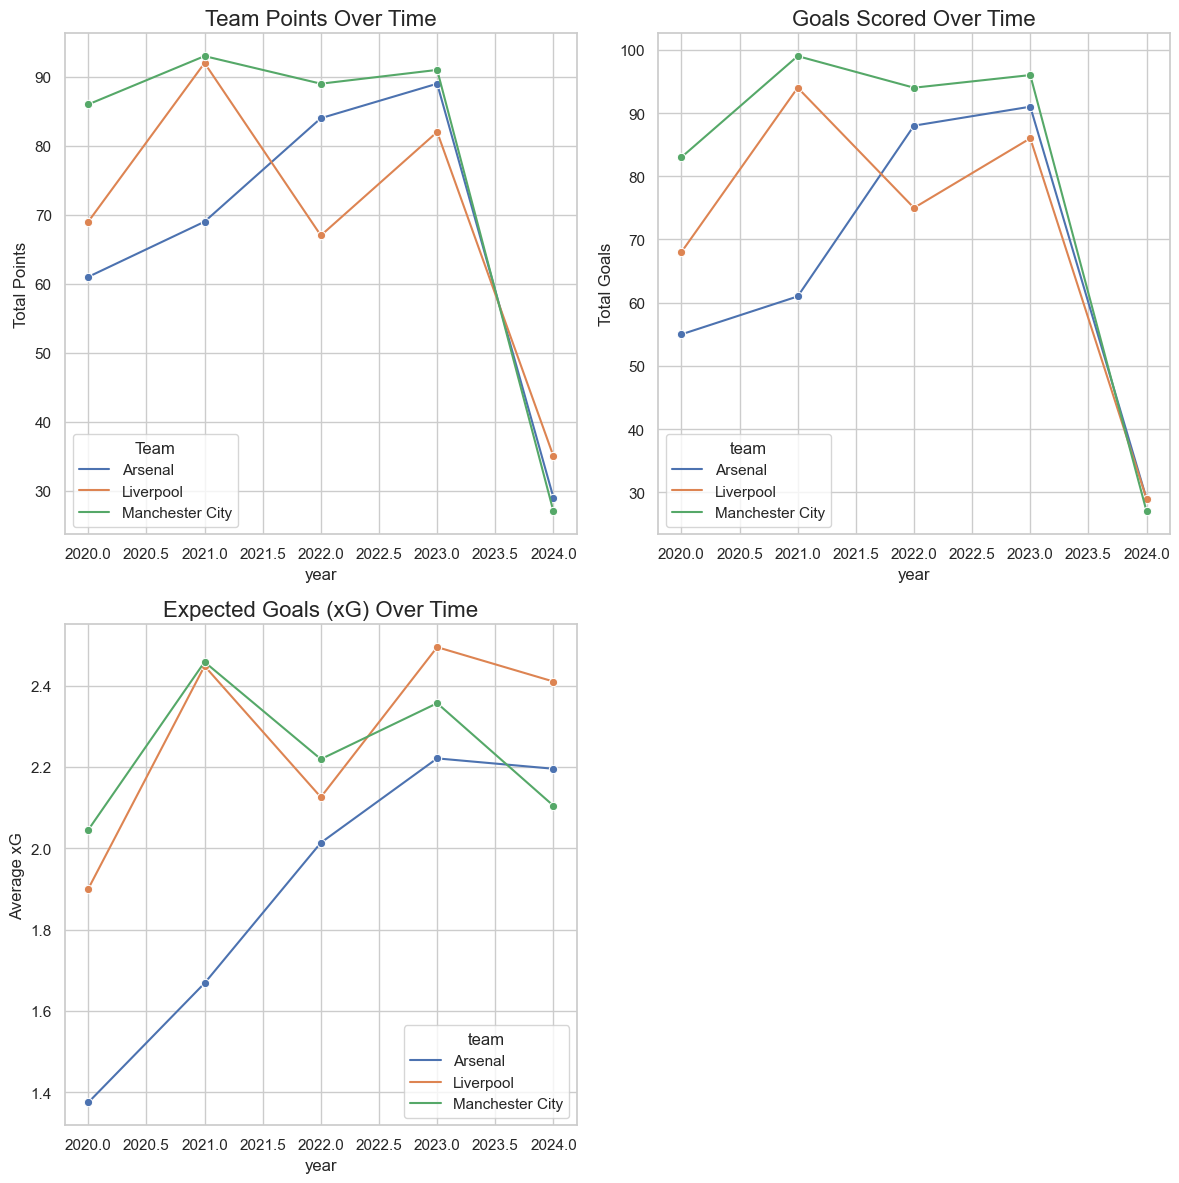

In [42]:
query_team_trends = """
SELECT year, team, SUM(pts) AS total_points, SUM(scored) AS total_scored, AVG(xG) AS avg_xG
FROM premier_league
GROUP BY year, team
ORDER BY year, team;
"""


df_team_trends = pd.read_sql(query_team_trends, con=engine_with_db)

selected_teams = ['Manchester City', 'Liverpool', 'Arsenal']  # Example teams
df_filtered = df_team_trends[df_team_trends['team'].isin(selected_teams)]


sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(12, 12))


sns.lineplot(
    data=df_filtered, x='year', y='total_points', hue='team', ax=axes[0, 0], marker='o'
)
axes[0, 0].set_title('Team Points Over Time', fontsize=16)
axes[0, 0].set_ylabel('Total Points')
axes[0, 0].legend(title='Team')

sns.lineplot(
    data=df_filtered, x='year', y='total_scored', hue='team', ax=axes[0, 1], marker='o'
)
axes[0, 1].set_title('Goals Scored Over Time', fontsize=16)
axes[0, 1].set_ylabel('Total Goals')


sns.lineplot(
    data=df_filtered, x='year', y='avg_xG', hue='team', ax=axes[1, 0], marker='o'
)
axes[1, 0].set_title('Expected Goals (xG) Over Time', fontsize=16)
axes[1, 0].set_ylabel('Average xG')


axes[1, 1].axis('off')  
axes[1, 1].set_title('') 


plt.tight_layout()
plt.show()


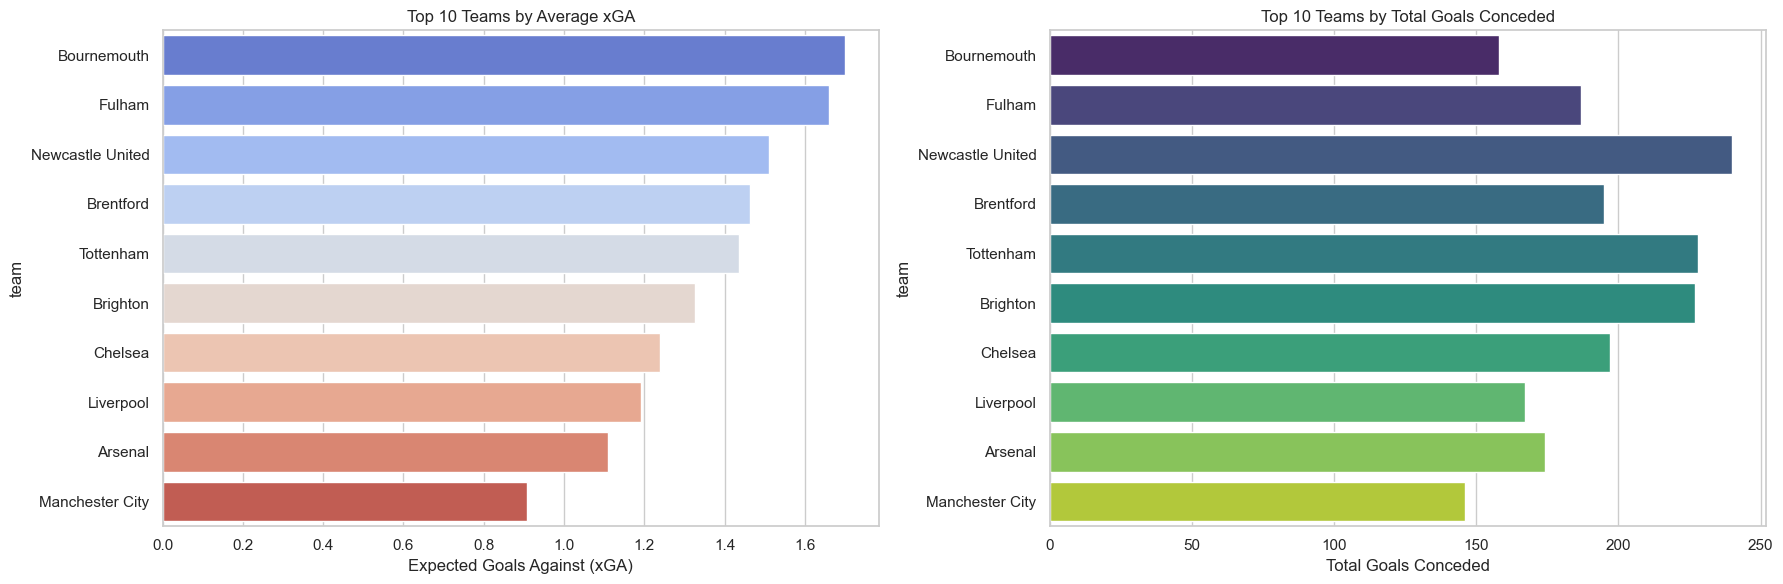

In [43]:
query_top_teams_analysis = """
SELECT team, AVG(xGA) AS avg_xGA, SUM(missed) AS total_goals_conceded
FROM premier_league
WHERE team IN ('Chelsea', 'Liverpool', 'Arsenal', 'Bournemouth', 'Fulham', 'Brentford', 'Newcastle United', 'Brighton', 'Tottenham', 'Manchester City')
GROUP BY team
ORDER BY avg_xGA DESC, total_goals_conceded DESC;
"""

df_top_teams_analysis = pd.read_sql(query_top_teams_analysis, con=engine_with_db)

sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(data=df_top_teams_analysis, x='avg_xGA', y='team', ax=axes[0], palette='coolwarm')
axes[0].set_title('Top 10 Teams by Average xGA')
axes[0].set_xlabel('Expected Goals Against (xGA)')

sns.barplot(data=df_top_teams_analysis, x='total_goals_conceded', y='team', ax=axes[1], palette='viridis')
axes[1].set_title('Top 10 Teams by Total Goals Conceded')
axes[1].set_xlabel('Total Goals Conceded')
plt.tight_layout()
plt.show()


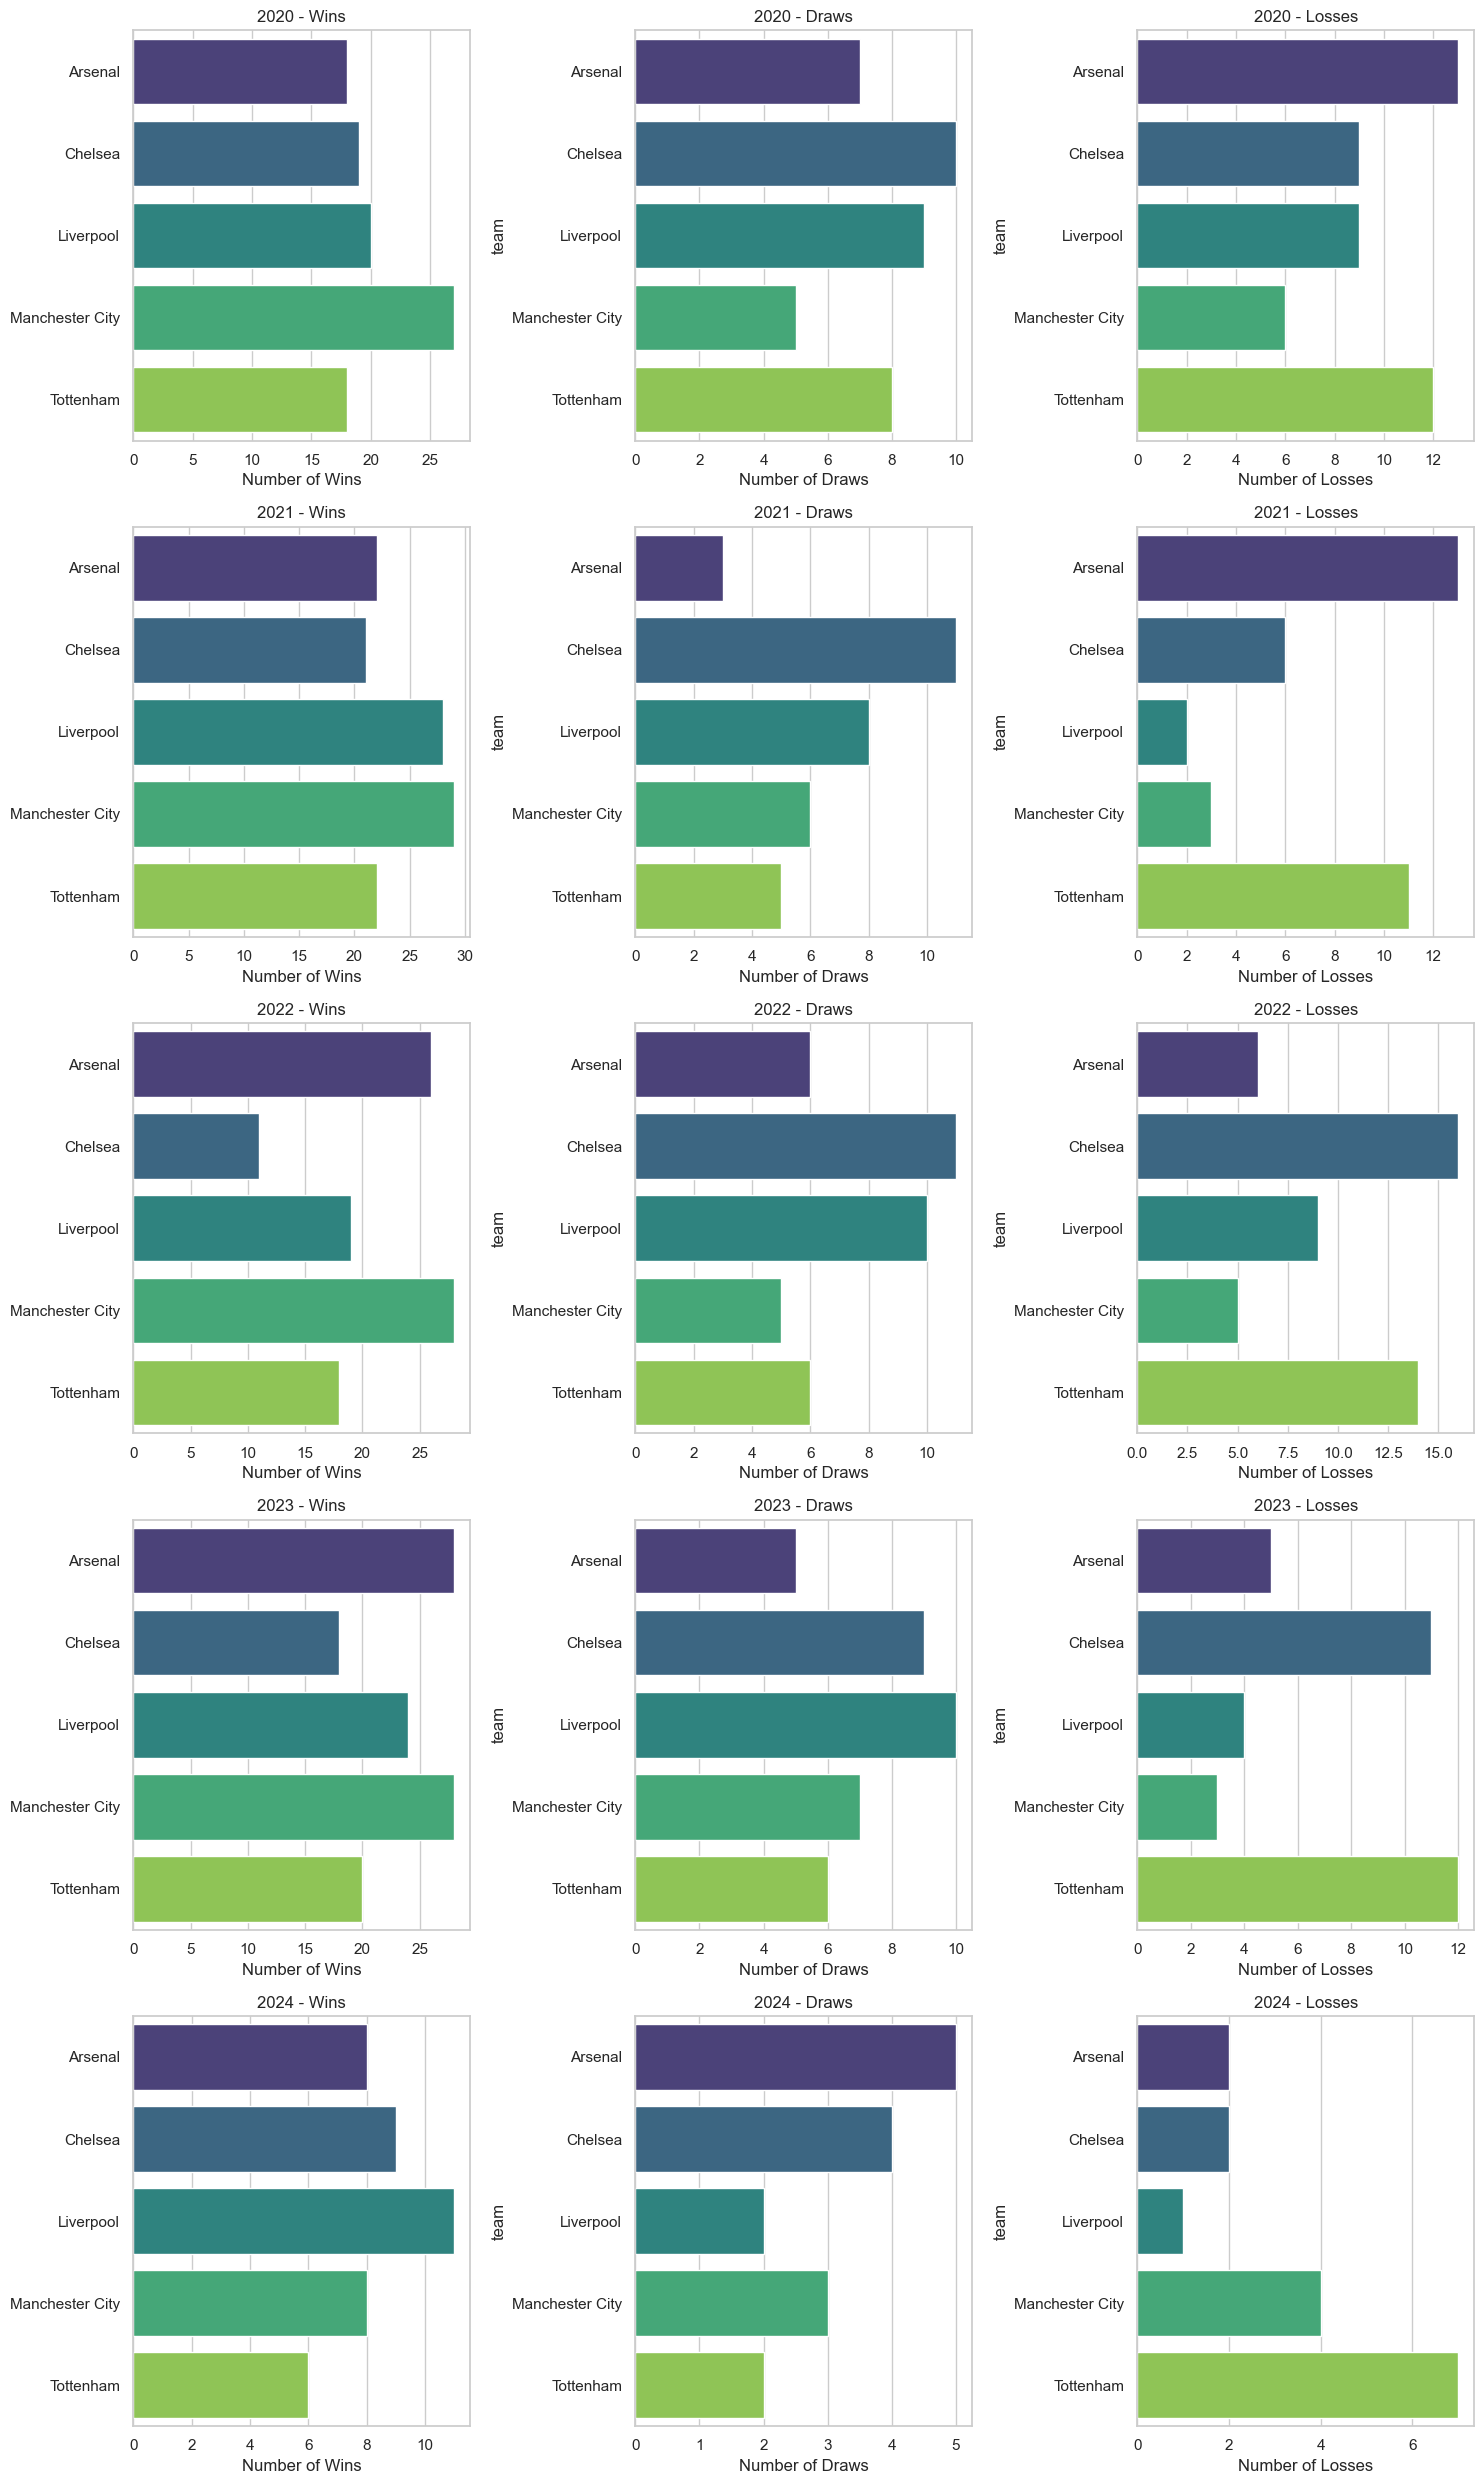

In [44]:
query_top_teams_analysis = """
SELECT 
    team, 
    year, 
    COUNT(CASE WHEN result = 'w' THEN 1 END) AS wins, 
    COUNT(CASE WHEN result = 'd' THEN 1 END) AS draws, 
    COUNT(CASE WHEN result = 'l' THEN 1 END) AS losses
FROM 
    premier_league
WHERE 
    team IN ('Manchester City', 'Liverpool', 'Arsenal', 'Chelsea', 'Tottenham')
GROUP BY 
    year, team
ORDER BY 
    year, team;
"""

df_top_teams_analysis = pd.read_sql(query_top_teams_analysis, con=engine_with_db)
sns.set(style="whitegrid")
years = [2020, 2021, 2022, 2023, 2024]
fig, axes = plt.subplots(5, 3, figsize=(15, 25))
for idx, year in enumerate(years):
    df_year = df_top_teams_analysis[df_top_teams_analysis['year'] == year]
    
    sns.barplot(data=df_year, x='wins', y='team', ax=axes[idx, 0], palette='viridis')
    axes[idx, 0].set_title(f'{year} - Wins')
    axes[idx, 0].set_xlabel('Number of Wins')
    axes[idx, 0].set_ylabel('')

    sns.barplot(data=df_year, x='draws', y='team', ax=axes[idx, 1], palette='viridis')
    axes[idx, 1].set_title(f'{year} - Draws')
    axes[idx, 1].set_xlabel('Number of Draws')

    sns.barplot(data=df_year, x='losses', y='team', ax=axes[idx, 2], palette='viridis')
    axes[idx, 2].set_title(f'{year} - Losses')
    axes[idx, 2].set_xlabel('Number of Losses')

plt.tight_layout()
plt.show()